# Fourth Down Project

Author: Seth Billiau, Sarah Lucioni

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 12 14:27:38 2020

@author: laurieshaw

See http://www.advancedfootballanalytics.com/index.php/home/research/game-strategy/120-4th-down-study
"""

import pandas as pd
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt



''' MAIN EXERCISE STARTS HERE '''
DATADIR = 'data/'
nfl_pbp = pd.read_csv(DATADIR + 'NFL_PbP_2009_2018_4thDownAnalysis.csv')


nfl_pbp

    

,game_id,home_team,away_team,posteam,posteam_type,defteam,yardline_100,game_date,game_seconds_remaining,game_half,...,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,return_team,return_yards,penalty_team,penalty_yards,next_score_relative_to_posteam,next_score_index
0,2009091000,PIT,TEN,PIT,home,TEN,30.0,2009-09-10,3600.0,Half1,...,0.0,0.0,1.0,0.0,PIT,39.0,NaN,NaN,6.0,72
1,2009091000,PIT,TEN,PIT,home,TEN,58.0,2009-09-10,3593.0,Half1,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,6.0,72
2,2009091000,PIT,TEN,PIT,home,TEN,53.0,2009-09-10,3556.0,Half1,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,6.0,72
3,2009091000,PIT,TEN,PIT,home,TEN,56.0,2009-09-10,3515.0,Half1,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,6.0,72
4,2009091000,PIT,TEN,PIT,home,TEN,56.0,2009-09-10,3507.0,Half1,...,0.0,0.0,0.0,1.0,NaN,0.0,NaN,NaN,6.0,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449366,2018121700,CAR,NO,CAR,home,NO,66.0,2018-12-17,63.0,Half2,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,-1
449367,2018121700,CAR,NO,CAR,home,NO,66.0,2018-12-17,58.0,Half2,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,-1
449368,2018121700,CAR,NO,CAR,home,NO,61.0,2018-12-17,38.0,Half2,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,-1
449369,2018121700,CAR,NO,NO,away,CAR,39.0,2018-12-17,35.0,Half2,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,-1


In [33]:

# game_seconds_remaining
# yardline_100
# ydstogo, down, 
# kick_distance

# next_score_index

#nfl_pbp["ydstogo"]
nfl_pbp.down
#print(np.sum(nfl_pbp.next_score_relative_to_posteam < 0 ))


0         NaN
1         1.0
2         2.0
3         3.0
4         4.0
         ... 
449366    2.0
449367    3.0
449368    4.0
449369    1.0
449370    NaN
Name: down, Length: 449371, dtype: float64

In [11]:
nfl_pbp.columns

Index(['game_id', 'home_team', 'away_team', 'posteam', 'posteam_type',
       'defteam', 'yardline_100', 'game_date', 'game_seconds_remaining',
       'game_half', 'quarter_end', 'drive', 'sp', 'qtr', 'down', 'goal_to_go',
       'time', 'yrdln', 'ydstogo', 'desc', 'play_type', 'yards_gained',
       'air_yards', 'yards_after_catch', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result', 'timeout',
       'timeout_team', 'td_team', 'total_home_score', 'total_away_score',
       'posteam_score', 'defteam_score', 'posteam_score_post',
       'defteam_score_post', 'interception', 'punt_inside_twenty', 'touchdown',
       'extra_point_attempt', 'two_point_attempt', 'field_goal_attempt',
       'kickoff_attempt', 'punt_attempt', 'return_team', 'return_yards',
       'penalty_team', 'penalty_yards', 'next_score_relative_to_posteam',
       'next_score_index'],
      dtype='object')

Text(0.5, 0.98, 'Kicking success rate by field position')

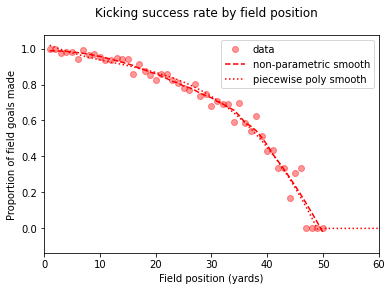

In [2]:
def non_parametric_smooth_with_nan(y,smooth_type='savgol',window=21):
    if smooth_type=='savgol':
        y[~np.isnan(y)] = signal.savgol_filter(y[~np.isnan(y)],window,2)
    return y

def poly_smooth_with_nan(x,y,deg):
    nanvals = np.isnan(y)
    pfit,cov = np.polyfit(x[~nanvals],y[~nanvals],deg, cov=True)
    yp = np.poly1d(pfit)(x)
    return yp,pfit,cov


# find field goal attempts
field_goal_attempts = nfl_pbp[nfl_pbp['field_goal_attempt']==1]
# initialize arrays
field_goal_success_rate = np.zeros(99)
field_goal_number_attempts = np.zeros(99)
field_position = np.arange(1,100) # i.e. from 1-99 yards
for i in field_position: # i.e. from 1-99 yards
    relevant_rows = field_goal_attempts.yardline_100==i
    field_goal_number_attempts[i-1] = np.sum(relevant_rows)
    if field_goal_number_attempts[i-1]>0:
        field_goal_success_rate[i-1] = np.sum( field_goal_attempts[relevant_rows].posteam_score_post > field_goal_attempts[relevant_rows].posteam_score) / np.sum(relevant_rows)
    else:
        field_goal_success_rate[i-1] = np.nan # no data at this distance
    

# non-parmetric filter
field_goal_success_rate_smooth_noparam = non_parametric_smooth_with_nan(field_goal_success_rate.copy(),window=21)

# make piecewise polynomial fit
field_goal_success_rate_smooth_poly = np.zeros(99)
cut_distance = 49 # anything greater than this is set to zero
field_goal_success_rate_smooth_poly[field_position<=cut_distance] = poly_smooth_with_nan(field_position[field_position<=cut_distance],field_goal_success_rate[field_position<=cut_distance],deg=3)[0]


fig,ax = plt.subplots()
ax.plot(field_position,field_goal_success_rate,'ro',alpha=0.4,label='data')
ax.plot(field_position,field_goal_success_rate_smooth_noparam,'r--',label='non-parametric smooth')
ax.plot(field_position,field_goal_success_rate_smooth_poly,'r:',label='piecewise poly smooth')
ax.set_xlabel('Field position (yards)')
ax.legend()
ax.set_ylabel('Proportion of field goals made')
ax.set_xlim(0,60)
fig.suptitle('Kicking success rate by field position')

    

In [154]:


# Expected Score for Going for it
# P(getting yards to go | 4th down) E(1D at 1st down yardage ) + (1 - P(getting yards to go | 4th down)) * E[Value of 1D at yardage for other team / turnover @ yardage ]

# Find all pass/run, yards to go in the dataset (all yards)
    # Calculate proportion of those plays 

passRunPlays = nfl_pbp[(nfl_pbp.play_type == "pass") | (nfl_pbp.play_type == 'run')]

probFirstDown = dict()
for x in range(1, 26):
    # print(len(passRunPlays.yards_gained[passRunPlays.ydstogo == x ]))
    probFirstDown[x] = np.mean(passRunPlays.yards_gained[passRunPlays.ydstogo == x ] >= x)
    
probFirstDown


{1: 0.6589875719915126,
 2: 0.5554759559416137,
 3: 0.49961867638335733,
 4: 0.44921150278293137,
 5: 0.4120660945305495,
 6: 0.3562562230335214,
 7: 0.3320202219158296,
 8: 0.2967504598405886,
 9: 0.259558765800424,
 10: 0.209928781956409,
 11: 0.2265361242403781,
 12: 0.19864612511671334,
 13: 0.17261729123635292,
 14: 0.1611214953271028,
 15: 0.13761964962976342,
 16: 0.11542610571736785,
 17: 0.10541149943630214,
 18: 0.08704188481675393,
 19: 0.08326787117046347,
 20: 0.07272249934365975,
 21: 0.06440677966101695,
 22: 0.0498812351543943,
 23: 0.047337278106508875,
 24: 0.050387596899224806,
 25: 0.04093567251461988}

In [155]:

firstDownPlays = nfl_pbp[nfl_pbp.down == 1]

expectedPointsOnFirst = {}
for x in range(1, 100): 
    expectedPointsOnFirst[x] = np.mean(firstDownPlays[firstDownPlays.yardline_100 == x].next_score_relative_to_posteam)
expectedPointsOnFirst


{1: 5.433887043189369,
 2: 5.188144329896907,
 3: 5.195402298850575,
 4: 4.931506849315069,
 5: 4.882211538461538,
 6: 4.6678321678321675,
 7: 4.558679706601467,
 8: 4.644599303135888,
 9: 4.383891213389122,
 10: 4.3526011560693645,
 11: 4.231768231768232,
 12: 4.171487603305785,
 13: 4.305015353121801,
 14: 4.133083411433927,
 15: 4.238263950398583,
 16: 4.017970401691332,
 17: 3.9930830039525693,
 18: 4.039575289575289,
 19: 3.9262295081967213,
 20: 3.8535564853556483,
 21: 3.8746518105849583,
 22: 3.8111824014665445,
 23: 3.702770780856423,
 24: 3.6327361563517915,
 25: 3.4954337899543377,
 26: 3.62874251497006,
 27: 3.5836092715231787,
 28: 3.4832214765100673,
 29: 3.4223412394797244,
 30: 3.436838390966831,
 31: 3.169811320754717,
 32: 3.211203633610901,
 33: 3.062453531598513,
 34: 3.00202565833896,
 35: 3.171823568136932,
 36: 2.984682713347921,
 37: 2.9160530191458025,
 38: 2.9338549075391183,
 39: 2.8511749347258486,
 40: 2.6564885496183206,
 41: 2.549047282992237,
 42: 2.2783

In [156]:
costOfTurnover = {}
for x in range(1, 100): 
     costOfTurnover[x] = -1 *  expectedPointsOnFirst[100-x]
costOfTurnover

{1: 0.46782178217821785,
 2: 0.11506849315068493,
 3: 0.05113636363636364,
 4: 0.2116788321167883,
 5: 0.14102564102564102,
 6: 0.025440313111545987,
 7: -0.07964601769911504,
 8: 0.06455696202531645,
 9: -0.15430622009569378,
 10: 0.0696594427244582,
 11: 0.003416856492027335,
 12: -0.4941588785046729,
 13: -0.09577754891864057,
 14: -0.37060414788097384,
 15: -0.1518987341772152,
 16: -0.44298605414273995,
 17: -0.5326633165829145,
 18: -0.5606850335070737,
 19: -0.6913827655310621,
 20: -0.5363859362224039,
 21: -0.3916167664670659,
 22: -0.6826979472140763,
 23: -0.7849145550972304,
 24: -0.6194690265486725,
 25: -0.8991007468373724,
 26: -0.8330578512396695,
 27: -1.0405569007263922,
 28: -0.909358446144791,
 29: -1.0361663652802893,
 30: -0.9950738916256158,
 31: -1.1030092592592593,
 32: -1.3278249218401073,
 33: -1.2340425531914894,
 34: -1.2792022792022792,
 35: -1.247559547051933,
 36: -1.5296969696969698,
 37: -1.3975155279503106,
 38: -1.457022076092062,
 39: -1.52651696129

In [157]:
# inputs are yardstogo, yardline on the field

expectedValueGoForIt = dict()
for yardline in range(1, 100):
    toFill = dict()
    for distance in range(1, 26): 
        if (yardline - distance) == 0:
            # TODO: if they score add 6 points (+6), model extra point/2 point-conversion (TODO), subtract giving ball to other team after kickoff (- 0.8)
            toFill[distance] = probFirstDown[distance] * (6 - 0.8) + (1 - probFirstDown[distance]) * costOfTurnover[yardline]
        elif (yardline - distance) < 0:
            pass
        else: 
            toFill[distance] = probFirstDown[distance] * expectedPointsOnFirst[yardline - distance] + (1- probFirstDown[distance]) * costOfTurnover[yardline]
        
    expectedValueGoForIt[yardline] = toFill

In [158]:
expectedValuePunt

{30: -0.5363859362224039,
 31: -0.5363859362224039,
 32: -0.5363859362224039,
 33: -0.5363859362224039,
 34: -0.5363859362224039,
 35: -0.5363859362224039,
 36: -0.5363859362224039,
 37: -0.5363859362224039,
 38: -0.5363859362224039,
 39: -0.5363859362224039,
 40: -0.5363859362224039,
 41: -0.5363859362224039,
 42: -0.5363859362224039,
 43: -0.5363859362224039,
 44: -0.5363859362224039,
 45: -0.5363859362224039,
 46: -0.5363859362224039,
 47: -0.5363859362224039,
 48: -0.5363859362224039,
 49: -0.5363859362224039,
 50: -0.5363859362224039,
 51: -0.5363859362224039,
 52: -0.5363859362224039,
 53: -0.5363859362224039,
 54: -0.5363859362224039,
 55: -0.5363859362224039,
 56: -0.5363859362224039,
 57: -0.5363859362224039,
 58: -0.5363859362224039,
 59: -0.5363859362224039,
 60: -0.5363859362224039,
 61: -0.5363859362224039,
 62: -0.5363859362224039,
 63: -0.5363859362224039,
 64: -0.5363859362224039,
 65: -0.5363859362224039,
 66: -0.5363859362224039,
 67: -0.5363859362224039,
 68: -0.5363

In [159]:
# Expected Score for Punt
puntPlays = nfl_pbp[nfl_pbp.play_type == "punt"]
puntPlays.head()

expectedValuePunt = {}
for x in range(30, 100): 
    net_punt_distance = np.round(np.mean(puntPlays[puntPlays.yardline_100 == x].kick_distance))
    expectedValuePunt[x] = -1 * expectedPointsOnFirst[min( 100 -  x + net_punt_distance, 80) ]
#     expectedValuePunt[x] = costOfTurnover[x - net_punt_distance]
expectedValuePunt

{30: -0.5363859362224039,
 31: -0.5363859362224039,
 32: -0.5363859362224039,
 33: -0.5363859362224039,
 34: -0.5363859362224039,
 35: -0.5363859362224039,
 36: -0.5363859362224039,
 37: -0.5363859362224039,
 38: -0.5363859362224039,
 39: -0.5363859362224039,
 40: -0.5363859362224039,
 41: -0.5363859362224039,
 42: -0.5363859362224039,
 43: -0.5363859362224039,
 44: -0.5363859362224039,
 45: -0.5363859362224039,
 46: -0.5363859362224039,
 47: -0.5363859362224039,
 48: -0.5363859362224039,
 49: -0.5363859362224039,
 50: -0.5363859362224039,
 51: -0.5363859362224039,
 52: -0.5363859362224039,
 53: -0.5363859362224039,
 54: -0.5363859362224039,
 55: -0.5363859362224039,
 56: -0.5363859362224039,
 57: -0.5363859362224039,
 58: -0.5363859362224039,
 59: -0.5363859362224039,
 60: -0.5363859362224039,
 61: -0.5363859362224039,
 62: -0.5363859362224039,
 63: -0.5363859362224039,
 64: -0.5363859362224039,
 65: -0.5363859362224039,
 66: -0.5363859362224039,
 67: -0.5363859362224039,
 68: -0.5363

In [160]:
# Expected Score for FG 
# P(FG IS GOOD | yardline) E(FG | giving the ball back ) + (1 - P(FG IS GOOD | yardline)) * E[Value of 1D at yardage for other team / turnover @ yardage ]

# FG is 3 points, minus the value of giving the ball back to the opponent at the 75 (-0.8)
expectedValueOfFG = 3 - 0.8


In [161]:
# Probability of making a FG

FGSuccessRate = dict(zip(range(1,99), np.clip(field_goal_success_rate_smooth_poly, a_min = 0, a_max = 1)))
# FGSuccessRate
FGSuccessRate

{1: 1.0,
 2: 1.0,
 3: 0.995675745658489,
 4: 0.9855666221527833,
 5: 0.9762089496464329,
 6: 0.9675162463247052,
 7: 0.9594020303728681,
 8: 0.951779819976189,
 9: 0.9445631333199357,
 10: 0.9376654885893758,
 11: 0.931000403969777,
 12: 0.9244813976464068,
 13: 0.9180219878045329,
 14: 0.911535692629423,
 15: 0.9049360303063447,
 16: 0.8981365190205657,
 17: 0.8910506769573535,
 18: 0.8835920223019759,
 19: 0.8756740732397004,
 20: 0.8672103479557948,
 21: 0.8581143646355265,
 22: 0.8482996414641634,
 23: 0.837679696626973,
 24: 0.8261680483092229,
 25: 0.813678214696181,
 26: 0.8001237139731145,
 27: 0.7854180643252915,
 28: 0.7694747839379792,
 29: 0.7522073909964455,
 30: 0.7335294036859582,
 31: 0.7133543401917847,
 32: 0.6915957186991926,
 33: 0.6681670573934497,
 34: 0.6429818744598235,
 35: 0.6159536880835819,
 36: 0.5869960164499921,
 37: 0.5560223777443223,
 38: 0.5229462901518396,
 39: 0.48768127185781185,
 40: 0.45014084104750673,
 41: 0.41023851590619187,
 42: 0.3678878146

In [162]:
expectedPointsForFG = {}
for x in range(1,100):
    if 100 - (x + 8) <= 0: 
        pass 
    else:
        expectedPointsForFG[x] = FGSuccessRate[x] * expectedValueOfFG - (1- FGSuccessRate[x]) * expectedPointsOnFirst[min(80, 100 - (x + 8))]
    
expectedPointsForFG 

{1: 2.2,
 2: 2.2,
 3: 2.188167171235241,
 4: 2.1605047078466924,
 5: 2.13489850440454,
 6: 2.1111119132872105,
 7: 2.088908286873132,
 8: 2.068050977540731,
 9: 2.0483033376684356,
 10: 2.029428719634673,
 11: 2.0111904758178705,
 12: 1.9933519585964556,
 13: 1.9875444091125862,
 14: 1.944984122741123,
 15: 1.9162421731960866,
 16: 1.9127990704420554,
 17: 1.8623550715911084,
 18: 1.8469278692960758,
 19: 1.7971147600977073,
 20: 1.7871093738557227,
 21: 1.7408344791170673,
 22: 1.7153061450919034,
 23: 1.6638545349931197,
 24: 1.586751308613171,
 25: 1.560163060680077,
 26: 1.5045899700967738,
 27: 1.460215999039775,
 28: 1.340210800214742,
 29: 1.308562241398393,
 30: 1.2255111466501332,
 31: 1.1318100868417793,
 32: 1.0086048894986666,
 33: 0.935210720987004,
 34: 0.8443429152059451,
 35: 0.6690067947486483,
 36: 0.5763910175900525,
 37: 0.4783534425863165,
 38: 0.16892342755781664,
 39: 0.04292761257831579,
 40: -0.18612589333536644,
 41: -0.2917686460335528,
 42: -0.51540611570768

In [168]:
# 100 for yardline 
# 25 for yards to go

expectedPointsArray = dict()
choiceArray = dict()

choiceList = ["FG", "Punt", "Go For It"]
for yards in range(1, 100):
    if yards > 91: 
        # Don't kick a FG you idiot
        FGexpected = -100 
    else:
        FGexpected = expectedPointsForFG[yards]
    
    if yards < 30:
        # Don't punt you idiot
        puntExpected = -0.5363859362224039
    else:
        puntExpected = expectedValuePunt[yards]
    

    for distance in range(1, min(yards, 26)):
        if distance == 1: 
            choiceArray[yards] = dict()
            expectedPointsArray[yards] = dict()
        GoForItExpected = expectedValueGoForIt[yards][distance]
        choiceID = np.array([FGexpected, puntExpected, GoForItExpected]).argmax()

        choiceArray[yards][distance] = choiceList[choiceID]
        expectedPointsArray[yards][distance] = max([FGexpected, puntExpected, GoForItExpected])



In [169]:
choiceArray

{2: {1: 'Go For It'},
 3: {1: 'Go For It', 2: 'Go For It'},
 4: {1: 'Go For It', 2: 'Go For It', 3: 'Go For It'},
 5: {1: 'Go For It', 2: 'Go For It', 3: 'Go For It', 4: 'Go For It'},
 6: {1: 'Go For It',
  2: 'Go For It',
  3: 'Go For It',
  4: 'Go For It',
  5: 'Go For It'},
 7: {1: 'Go For It',
  2: 'Go For It',
  3: 'Go For It',
  4: 'Go For It',
  5: 'Go For It',
  6: 'FG'},
 8: {1: 'Go For It',
  2: 'Go For It',
  3: 'Go For It',
  4: 'Go For It',
  5: 'Go For It',
  6: 'FG',
  7: 'FG'},
 9: {1: 'Go For It',
  2: 'Go For It',
  3: 'Go For It',
  4: 'Go For It',
  5: 'FG',
  6: 'FG',
  7: 'FG',
  8: 'FG'},
 10: {1: 'Go For It',
  2: 'Go For It',
  3: 'Go For It',
  4: 'Go For It',
  5: 'Go For It',
  6: 'FG',
  7: 'FG',
  8: 'FG',
  9: 'FG'},
 11: {1: 'Go For It',
  2: 'Go For It',
  3: 'Go For It',
  4: 'Go For It',
  5: 'FG',
  6: 'FG',
  7: 'FG',
  8: 'FG',
  9: 'FG',
  10: 'FG'},
 12: {1: 'Go For It',
  2: 'Go For It',
  3: 'FG',
  4: 'FG',
  5: 'FG',
  6: 'FG',
  7: 'FG',
  8

In [171]:
# expectedPointsArray

In [174]:
dict = {"a": 1, "b": 2, "c": 3, "d": 4}

data = list(expectedPointsArray.items())
an_array = np.array(data)

pd.DataFrame(an_array)

,0,1
0,2,{1: 3.6201038153040948}
1,3,"{1: 3.4363607706234576, 2: 3.04112494295644}"
2,4,"{1: 3.49589065893681, 2: 2.9759857617066587, 3..."
3,5,"{1: 3.2978932211472585, 2: 2.9486103467199247,..."
4,6,"{1: 3.225992190623181, 2: 2.7506423122223596, ..."
...,...,...
93,95,"{1: -1.6816596609499035, 2: -2.057542768273717..."
94,96,"{1: -1.7746392691934514, 2: -2.139521956642579..."
95,97,"{1: -1.9111904720305533, 2: -2.010410958904109..."
96,98,"{1: -1.8029199229098136, 2: -2.095766129032258..."
